###  Describe el conjunto de datos y extrae algunas conclusiones de las variables, su distribución y su correlación. 

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

cal_hou = datasets.fetch_california_housing()

In [2]:
import pandas as pd
df = pd.DataFrame(data=cal_hou['data'], columns=cal_hou['feature_names']) 
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Eliminamos de la lista las variables Latitud y Longitud.

In [3]:
fn_aux = cal_hou['feature_names'].copy()
fn_aux.remove('Latitude')
fn_aux.remove('Longitude')
cal_hou_fn = fn_aux.copy()
cal_hou['feature_names'] = fn_aux
data_aux = cal_hou['data'].copy()
data_aux = np.delete(data_aux,6,1)
data_aux = np.delete(data_aux,6,1)
data_cal_hou = data_aux.copy()

In [4]:
df = pd.DataFrame(data=data_aux, columns=fn_aux) 
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


Destacamos que lo único que podemos saber de estas variables es que las escalas no concuerdan. Sólo con estos estadísticos no podemos hacer nada y nuestros conocimientos de estadística son limitados, por ello, vamos a tratar de usar una aproximación empírica para extraer conclusiones de todos estos datos.

Como primera aproximación supondremos que un criterio de clasifación bastante naïve es el económico.
Vamos a tratar de identificar cada sector de la población con esos criterios mediante colores: (clase baja -> rojo, clase media -> naranja, clase alta -> verde).

In [5]:
import collections
import operator
print(df['MedInc'][87])
medinc = sorted(df['MedInc'].items(), key=lambda kv: kv[1])
l = len(medinc)
print(l)
for x in range(0,l):
    a,b = medinc[x]
    medinc[x] = (x,b)
#print(medinc)
medincmap = dict(medinc)

0.76
20640


In [6]:
df2 = df.copy()
df2['MedIncOrd'] = sorted(df['MedInc'].values)

In [7]:
# Definición de una función
def clasificarDF2(x):
    if x < 3:
        return 'baja'
    elif x < 7:
        return 'media'
    else:
        return 'alta'

In [8]:
from pandas.plotting import scatter_matrix

dic_colors = { 'baja': 'red', 'media': 'orange', 'alta': 'green' }
colors = df2['MedIncOrd'].map(clasificarDF2).map(dic_colors)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D81D00B400>,
      dtype=object)

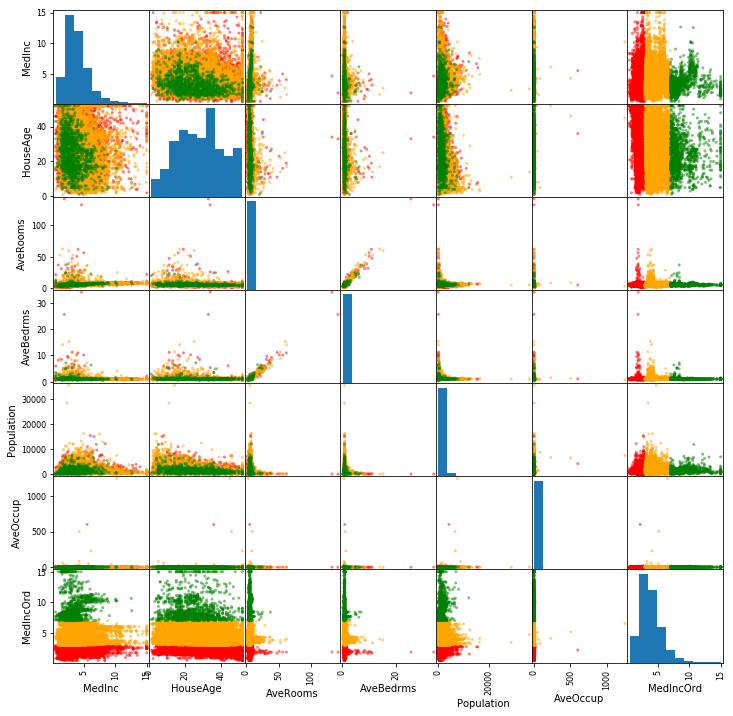

In [9]:
scatter_matrix(df2, figsize = (12, 12), diagonal = 'hist', color=colors)

A la vista de los resultados, parece ligeramente razonable el análisis, pero no es un buen análisis. Por ello, vamos a tratar de hacer un análisis más científico:

### Considera si debes re-escalar las variables antes y el tipo de escalado que usas. Razona tu elección. 

Puesto que no podemos sacar ningún tipo información a simple vista, trataremos de reescalar las variables para ver si hay algún tipo de correlacionadas. Además parece razonable hacerlo al estar los datos en escalas muy distintas.

###### Nota: a partir de ahora y mientas no se diga lo contrario, los colores no representan nada.

In [10]:
#normalizamos los datos:

from sklearn.preprocessing import Normalizer
colors = {'coral', 'y', 'rebeccapurple' }
# Normalizamos los datos para que estén centrados en 0 y con varianza 1
scaler = Normalizer()
df_values_normal = scaler.fit_transform(df.values.copy())
df_normal = pd.DataFrame(data=df_values_normal, columns=cal_hou['feature_names']) 
df_normal.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.004889,0.037450,0.007642,0.001568,0.996317,0.003642
std,0.010754,0.063291,0.024530,0.005466,0.032200,0.007830
min,0.000072,0.000184,0.000148,0.000028,0.151008,0.000164
25%,0.001760,0.012447,0.002837,0.000610,0.999037,0.001653
50%,0.003000,0.023976,0.004438,0.000903,0.999684,0.002442
75%,0.005021,0.042432,0.006918,0.001343,0.999906,0.003571
max,0.406675,0.981552,0.939911,0.233944,1.000000,0.413359


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D82310D390>,
      dtype=object)

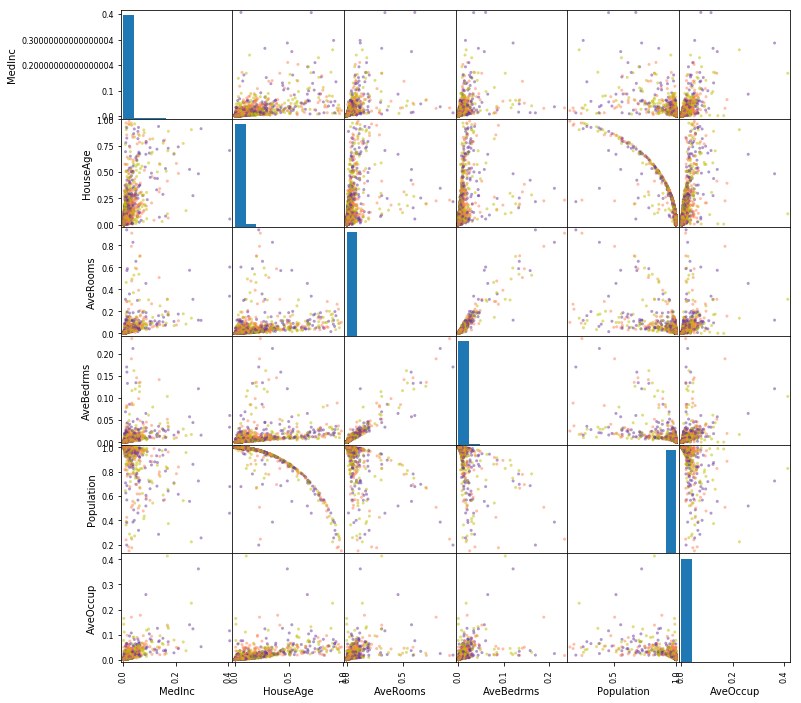

In [11]:
scatter_matrix(df_normal, figsize = (12, 12), diagonal = 'hist', color=colors)

De aquí, deducimos que parece razonable que la _población_ y la _edad de la casa_ estan correlacionadas, mas dudamos sobre el número de _habitaciones_ y _dormitorios_, asi que procederemos a quitar los datos extremos y reeanalizarlo todo de nuevo.

In [12]:
df2=df.copy().loc[df.AveBedrms<15]
print(len(df2), len(df))


20637 20640


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8246910B8>,
      dtype=object)

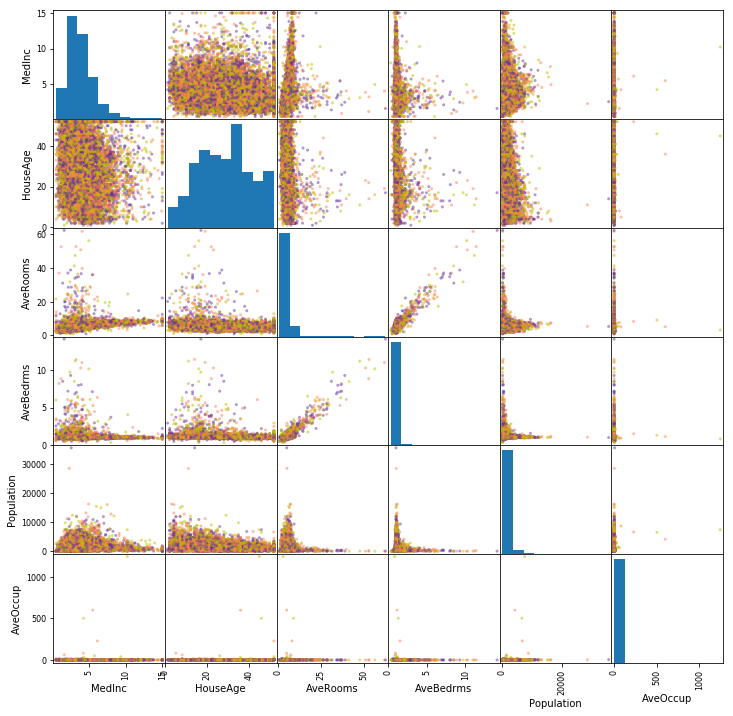

In [13]:
scatter_matrix(df2, figsize = (12, 12), diagonal = 'hist', color=colors)

Parece al final razonable suponer que en efecto las _habitaciones_ y los _dormitorios_ están correlacionados, así que procederemos a eliminar también los _dormitorios_. Téngase en cuenta que esto es en general beneficioso ya que se hace que el algoritmo acabe antes al tener menos variables con las que describimos la misma información.

In [14]:
#Como la edad de la csa y la poblacion están correlacionados, consideramos que podemos prescindir de un de estos dos datos
data_aux2 = np.delete(data_aux,3,1)
data_aux2 = np.delete(data_aux2,1,1)
fn_aux.remove('AveBedrms')
fn_aux.remove('HouseAge')
df_def = pd.DataFrame(data=data_aux2, columns=fn_aux) 
df_def.describe()

,MedInc,AveRooms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,5.429000,1425.476744,3.070655
std,1.899822,2.474173,1132.462122,10.386050
min,0.499900,0.846154,3.000000,0.692308
25%,2.563400,4.440716,787.000000,2.429741
50%,3.534800,5.229129,1166.000000,2.818116
75%,4.743250,6.052381,1725.000000,3.282261
max,15.000100,141.909091,35682.000000,1243.333333


In [15]:
# Estandarizamos los datos para que estén centrados en 0 y con varianza 1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_values_std = scaler.fit_transform(df_def.values.copy())
df_std = pd.DataFrame(data=df_values_std, columns=cal_hou['feature_names']) 
df_std.describe()

,MedInc,AveRooms,Population,AveOccup
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-2.522018e-14,4.640911e-15,-7.506747e-17,-7.361326e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-1.852319e+00,-1.256123e+00,-2.290000e-01
25%,-6.881186e-01,-3.994496e-01,-5.638089e-01,-6.171062e-02
50%,-1.767951e-01,-8.078489e-02,-2.291318e-01,-2.431585e-02
75%,4.593063e-01,2.519615e-01,2.644949e-01,2.037453e-02
max,5.858286e+00,5.516324e+01,3.025033e+01,1.194191e+02


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D825F10DD8>,
      dtype=object)

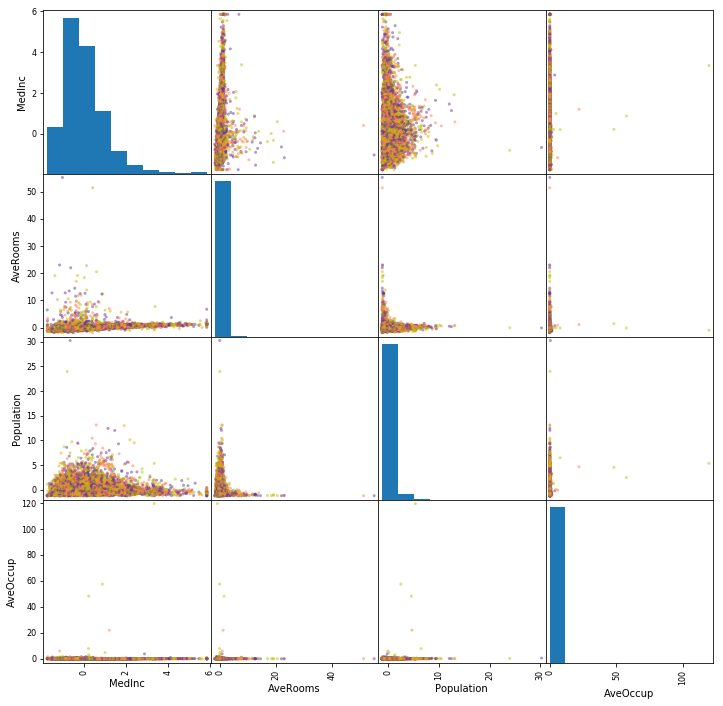

In [16]:
scatter_matrix(df_std, figsize = (12, 12), diagonal = 'hist', color=colors)

In [17]:
scaler_Normal = Normalizer()
df_values_normal = scaler_Normal.fit_transform(df_def.values.copy())
df_normal = pd.DataFrame(data=df_values_normal, columns=cal_hou['feature_names']) 
df_normal.describe()

,MedInc,AveRooms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.005155,0.008110,0.999261,0.003863
std,0.014652,0.029210,0.013795,0.010608
min,0.000072,0.000148,0.206778,0.000164
25%,0.001761,0.002837,0.999955,0.001653
50%,0.003002,0.004439,0.999982,0.002445
75%,0.005027,0.006924,0.999992,0.003571
max,0.717747,0.978122,1.000000,0.519169


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D827A8F978>,
      dtype=object)

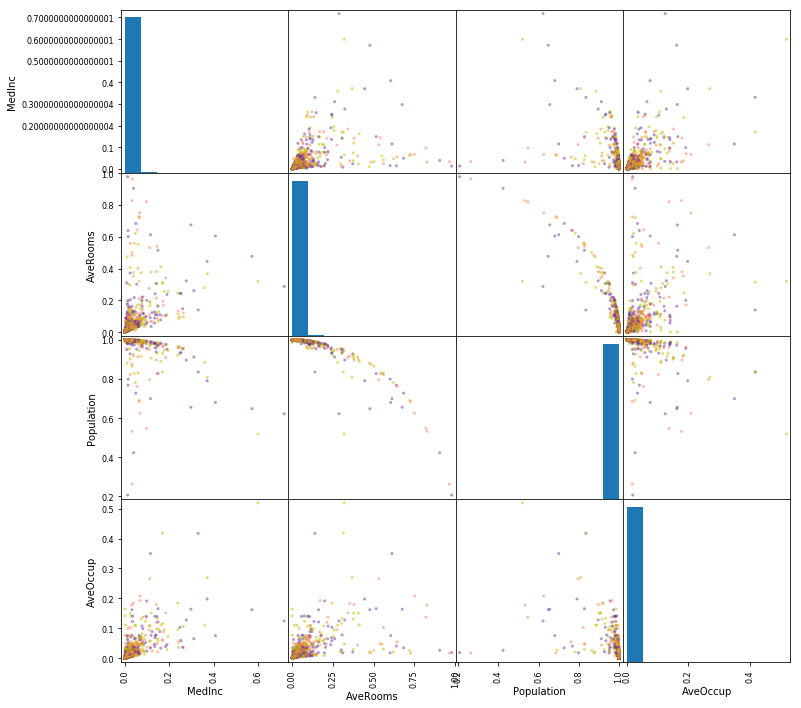

In [18]:
scatter_matrix(df_normal, figsize = (12, 12), diagonal = 'hist', color=colors)

Sin embargo, no hemos sabido pronunciarnos entre si debiéramos o no utilizar un tipo u otro de ajuste. Por tanto, hemos decidido que merecía la pena realizar ambos ajustes y decidir ya al final, con las conclusiones obtenidas, si ha merecido la pena la inversión (haciendo un símil a lo que se haría en una empresa con un cliente insatsifecho: cambiar el método y repetir de nuevo).

### Aplica el algoritmo de clustering k-medias y determina el número de clusters que consideras adecuado para el conjunto de datos, justificando tu elección. 

In [19]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
import numpy as np

np.random.seed(7)

Importamos las liberías necesarias para realizar el algorimo _k-means_ y forzamos a que el random_state sea $0$ en ambos casos para que la ejecución, aunque aleatoría, siempre sea la misma (de esa manera si se ejectua de nuevo los resultados obtenidos son discutibles con el mismo razonamiento).

Text(0.5,1,'Valor de silueta para diferentes k')

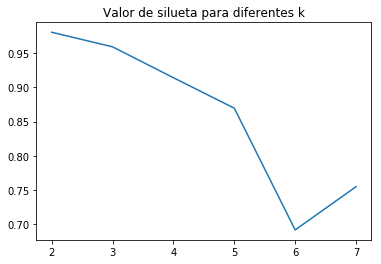

In [20]:
K_MAX = 8
silueta_normal = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km1 = KMeans(init='random', n_clusters=k,random_state=0)
    km1.fit(df_normal)
    #plot_clusters(X, km.labels_, km.cluster_centers_)
    
    silueta_normal[k-2] = silhouette_score(df_normal, km1.labels_) 
plt.plot(range(2, K_MAX), silueta_normal)
plt.title('Valor de silueta para diferentes k')

Text(0,0.5,'Valor de silueta')

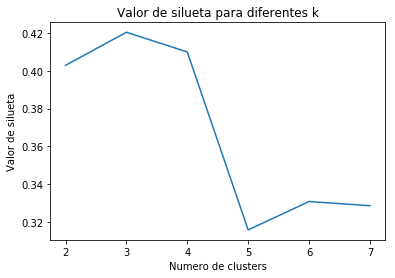

In [21]:
K_MAX = 8
silueta_std = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km2 = KMeans(init='random', n_clusters=k,random_state=0)
    km2.fit(df_std)
    #plot_clusters(X, km.labels_, km.cluster_centers_)
    
    silueta_std[k-2] = silhouette_score(df_std, km2.labels_) 
plt.plot(range(2, K_MAX), silueta_std)
plt.title('Valor de silueta para diferentes k')
plt.xlabel('Numero de clusters')
plt.ylabel('Valor de silueta')

De la ejecución del algoritmo deducimos que si los datos están normalizados, haciendo dos clusters los datos están bien agrupados, mas si estan estandarizados, nuestro algorimo determina hasta tres clusters distintos. Esta constante es elegida al ser aquella que máximiza la función del valor de silueta en cada caso.

In [22]:
km_normal = KMeans(init='random', n_clusters=2)

# Agrupar los puntos en clusters
km_normal.fit(df_normal)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels_normal = km_normal.labels_
centers_normal = km_normal.cluster_centers_

In [23]:
km_std = KMeans(init='random', n_clusters=3)

# Agrupar los puntos en clusters
km_std.fit(df_std)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels_std = km_std.labels_
centers_std = km_std.cluster_centers_

### Pinta los clusters en un gráfico de dispersión en función de dos de las variables de entrada que consideres interesantes. ¿Ves que considerando solamente esas dos variables se diferencien bien algunos de los clusters? ¿Cuáles? Por el contrario, ¿cuáles se confuden más? 

Una vez realizado el _k-means_, representaremos en diversas _scattermatrix_ los resultados obtenidos.

In [24]:
dic_colors_normal = { 0: 'darkorange', 1: 'rebeccapurple'}
df_normal['grupo']=labels_normal
colors_normal=df_normal['grupo'].map(dic_colors_normal)
df_normal = df_normal.drop(['grupo'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D82972BEF0>,
      dtype=object)

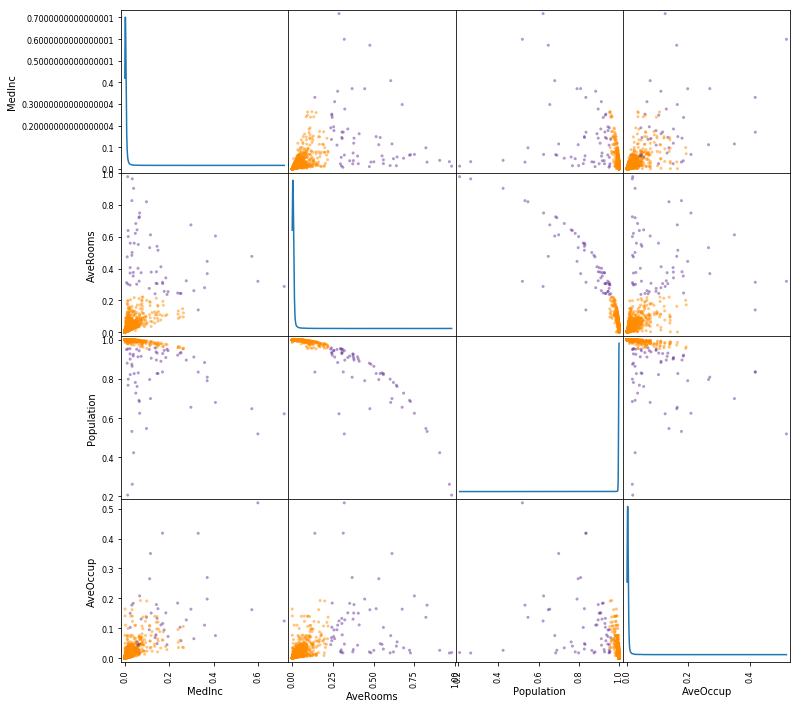

In [25]:
scatter_matrix(df_normal, figsize = (12, 12), diagonal = 'kde', color=colors_normal)

Como se puede ver en la matriz, los dos clusters no tienen el mismo número de representantes. Uno, el morado, tiene una gran cantidad de individuos, todos ellos concentrados en las zonas inferiores de las celdas a estudiar.

Por ejemplo, si consideramos las variables _ocupación media_ frente a _ingresos medio_ o _número de habitaciones_ es claro que el cluster naranja está muy concentrado en zonas de ocupación baja frente al cluster morado.

Destacamos que, en general, los clusters están bien diferenciados unos de los otros.

In [26]:
dic_colors_std = { 0: 'lawngreen', 1: 'dodgerblue', 2: 'coral'}
df_std['grupo']=labels_std
colors_std=df_std['grupo'].map(dic_colors_std)
df_std = df_std.drop(['grupo'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D82B077FD0>,
      dtype=object)

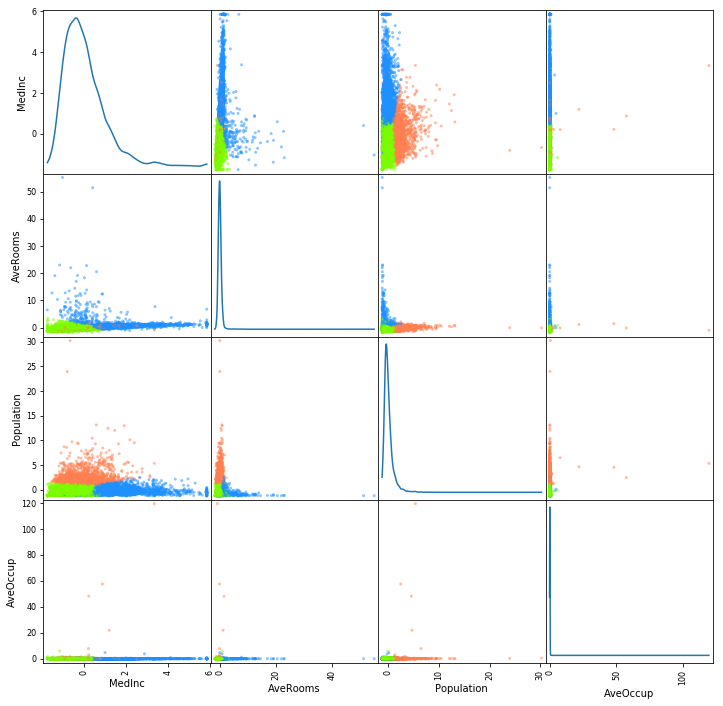

In [27]:
scatter_matrix(df_std, figsize = (12, 12), diagonal = 'kde', color=colors_std)

En este caso los clusters no están tan bien diferenciados.

Por una parte destacamos que a simple vista parece que el número de individuos está bastante equilibrado.

Por otra, si confrontamos las variables _ingreso medio_ frente a _población_, vemos que cada cluster está bein delimitado, así como en la gran mayoría de casos.

Sin embargo no es así en el caso del _ingreso medio_ frente al _número de habitaciones_ o en cualquier comparación relacionado con la _ocupación media_, ya que en todos esos casos, detectamos que al menos uno de los tres clusters queda absorbido dentro del otro. 

### Trata de averiguar qué representa cada uno de los clusters que has obtenido. Si en el apartado anterior has obtenido más de 5 clusters, basta con que comentes los dos más numerosos y los dos menos numerosos. ¿Qué valores toman las variables en cada cluster? Puedes usar estadísticos descriptivos.

In [28]:
df_sinEscalar_Normal=pd.DataFrame(data=data_cal_hou, columns=cal_hou_fn) 
df_sinEscalar_Normal['grupo']=labels_normal
colors_sinEscalar_normal=df_sinEscalar_Normal['grupo'].map(dic_colors_normal)
df_sinEscalar_Normal = df_sinEscalar_Normal.drop(['grupo'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D82D9BE668>,
      dtype=object)

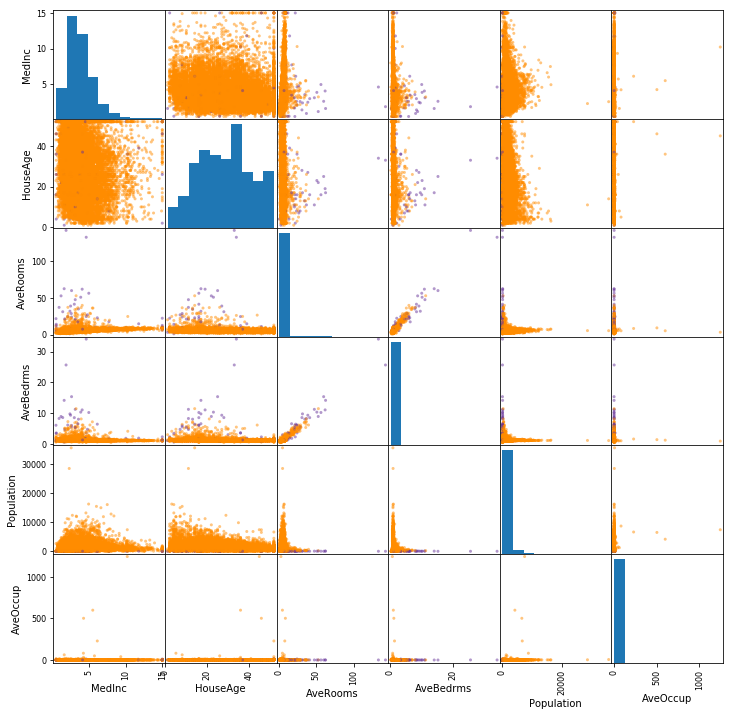

In [29]:
scatter_matrix(df_sinEscalar_Normal, figsize = (12, 12), diagonal = 'hist', color=colors_sinEscalar_normal)

En este caso, sin embargo, nos es dificil distinguir que ha sido el criterio de separacion de clusters, aunque podría ser casas grandes frente al resto de casas. Parece un agrupamiento peregrino y suponemos que si un cliente nos pidiera estos datos nos tocaría cambiar de método.

Los valores que toman, excepto en la partición propuesta, son todos los del dominio, no hay ningún tipo de criterio.

In [30]:
df_sinEscalar_std=pd.DataFrame(data=data_cal_hou, columns=cal_hou_fn) 
df_sinEscalar_std['grupo']=labels_std
colors_sinEscalar_std=df_sinEscalar_std['grupo'].map(dic_colors_std)
df_sinEscalar_std = df_sinEscalar_std.drop(['grupo'], axis=1)

In [ ]:
scatter_matrix(df_sinEscalar_std, figsize = (12, 12), diagonal = 'hist', color=colors_sinEscalar_std)

En este caso parece que las respuestas obtenidas tienen más sentido. Estudiando de nuevo el _ingreso medio_ frente a la _población_, observamos que el cluster verde representa a las personas del medio rural de ingresos bajos, el azul a las personas del medio rural de clase medio-alta y alta y el cluster rojo a aquellas personas que viven en poblaciones de media y alta densidad.

En este caso, las personas de baja renta tienen casas de menor número de habitaciones, al igual que los de las grandes ciudades ya que el espacio en estas es muy limitado.

Por otra parte, vemos que, respecto a la edad de la casa, las zonas de mayor población han sufrido una rápida expansión en los últimos años, lo que hace que la mayor parte de estas no superen los $25$ años, la gente rural de renta baja suele tener casas antiguas (aunque no es condición necesaria en absoluto) y la gente con dinero del mundo rural también ha tenido la oportunidad de cambiar de casa (cosa que suponemos que el resto no ha podido).



In [ ]:
df_sinEscalar_c=df_sinEscalar_std.copy()
df_sinEscalar_c['grupo']=labels_std


In [ ]:
df_sinEscalar_verde=df_sinEscalar_c.copy().loc[df_sinEscalar_c.grupo == 0]
df_sinEscalar_verde = df_sinEscalar_verde.drop(['grupo'], axis=1)
df_sinEscalar_verde.describe()

In [ ]:
df_sinEscalar_azul=df_sinEscalar_c.copy().loc[df_sinEscalar_c.grupo == 1]
df_sinEscalar_azul = df_sinEscalar_azul.drop(['grupo'], axis=1)
df_sinEscalar_azul.describe()

In [ ]:
df_sinEscalar_rojo=df_sinEscalar_c.copy().loc[df_sinEscalar_c.grupo == 2]
df_sinEscalar_rojo = df_sinEscalar_rojo.drop(['grupo'], axis=1)
df_sinEscalar_rojo.describe()

Se muestran aquí por secciones los distintos valores estudiados de manera estadística de cada grupo. Como se puede ver, el análsis realizado a simple vista es bastante razonable.